In [1]:
!pip install -q catboost

In [2]:
import pandas as pd
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

#for hypertuning
# import optuna

# Machine Learning Algorithms
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    ExtraTreesClassifier
)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib

# Library for Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [3]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [4]:
train_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test_df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# **Data Exploration**

In [7]:
print("train_df shape: ",train_df.shape)

train_df shape:  (381109, 12)


In [8]:
print("test_df shape: ",test_df.shape)

test_df shape:  (127037, 11)


In [9]:
train_df['Response'].value_counts()

,count
Response,
0,334399
1,46710


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 9 Numerical Columns in dataset
There are 3 Categorical Columns in dataset


Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [12]:
id = test_df['id']

In [13]:
cols = ["id"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

Checking if There's Any Duplicate Records.


In [14]:
print("Duplicates in Dataset: ",train_df.duplicated().sum())

Duplicates in Dataset:  269


In [15]:
train_df.drop_duplicates(inplace = True)

 Computing Total No. of Missing Values and the Percentage of Missing Values

In [16]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0
Vintage,0,0.0


Performing Descriptive Analysis


In [17]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,380840.0,38.82,15.51,20.0,25.0,36.0,49.0,85.0
Driving_License,380840.0,1.00,0.05,0.0,1.0,1.0,1.0,1.0
Region_Code,380840.0,26.39,13.23,0.0,15.0,28.0,35.0,52.0
Previously_Insured,380840.0,0.46,0.50,0.0,0.0,0.0,1.0,1.0
Annual_Premium,380840.0,30584.02,17203.26,2630.0,24426.0,31678.5,39408.0,540165.0
Policy_Sales_Channel,380840.0,112.03,54.21,1.0,29.0,133.0,152.0,163.0
Vintage,380840.0,154.34,83.67,10.0,82.0,154.0,227.0,299.0
Response,380840.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0


### **Checking Unique Values of Categorical Attributes.**

In [18]:
# Checking Unique entries in Train_df
cat_cols = train_df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(train_df[column]))

Unique values of  Gender {'Female', 'Male'}
Unique values of  Vehicle_Age {'1-2 Year', '> 2 Years', '< 1 Year'}
Unique values of  Vehicle_Damage {'Yes', 'No'}


# Exploratory Data Analysis (EDA)

## **Visualising Class Distribution**

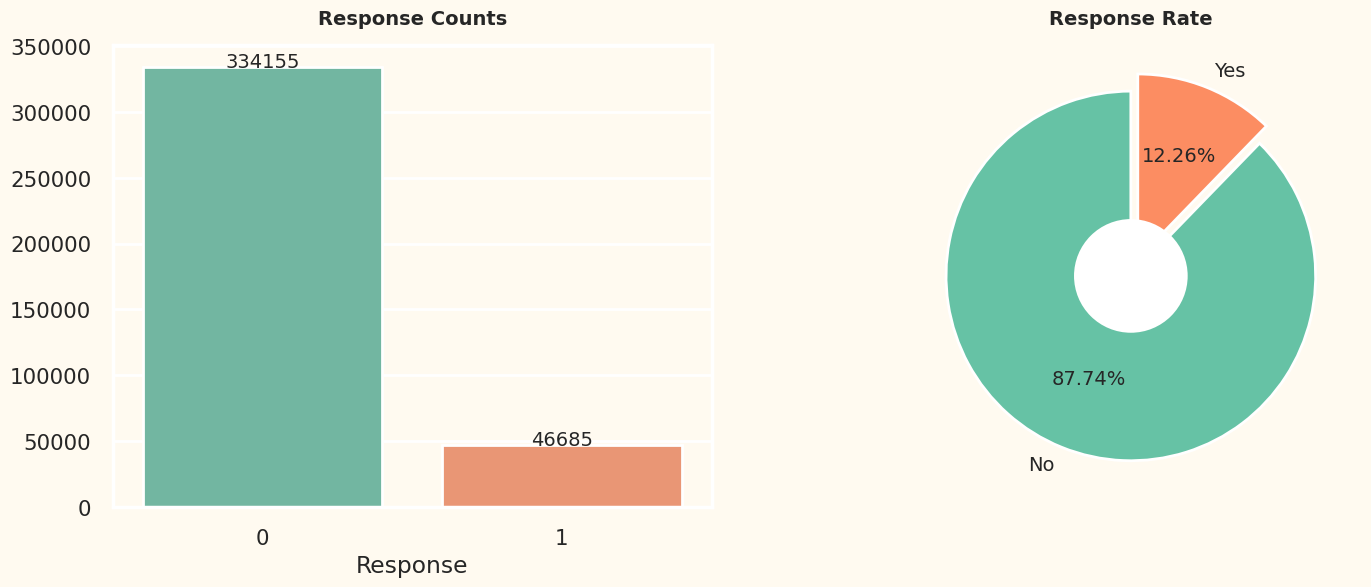

In [19]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
Response_rate = train_df["Response"].value_counts()
sns.barplot(x=Response_rate.index,y=Response_rate.values,palette= 'Set2')
plt.title("Response Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(Response_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(Response_rate))
plt.pie(Response_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Response Rate",fontweight="black",size=14 ,pad=15)
plt.show()

## **Analyzing Response by Categorical col**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def pie_bar_plot(df, col, Response_col):
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    wedges, texts, autotexts = plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
                                       colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Adding legend for the pie chart
    plt.legend(wedges, ax1.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)

    # Calculate value counts and percentage of each category within Response=1
    value_1 = value_counts
    value_2 = df[df[Response_col] == 1][col].value_counts().sort_index()

    # Calculate percentages
    percentages = (value_2 / value_1 * 100).fillna(0)

    sns.barplot(x=value_2.index, y=value_2.values, palette=colors)
    plt.title(f"Response Rate by {col}", fontweight="black", size=14, pad=15)

    for index, value in enumerate(value_2):
        plt.text(index, value, f"{value} ({percentages[index]:.1f}%)", ha="center", va="bottom", size=10)

    # Adding legend for the Response in the bar plot
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10, label='Response 0'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10, label='Response 1')
    ]
    plt.legend(handles=handles, title="Response", loc="center left", bbox_to_anchor=(1, 0.5, 0.5, 1))

    plt.tight_layout()
    plt.show()

## **Analyzing Response by Gender**

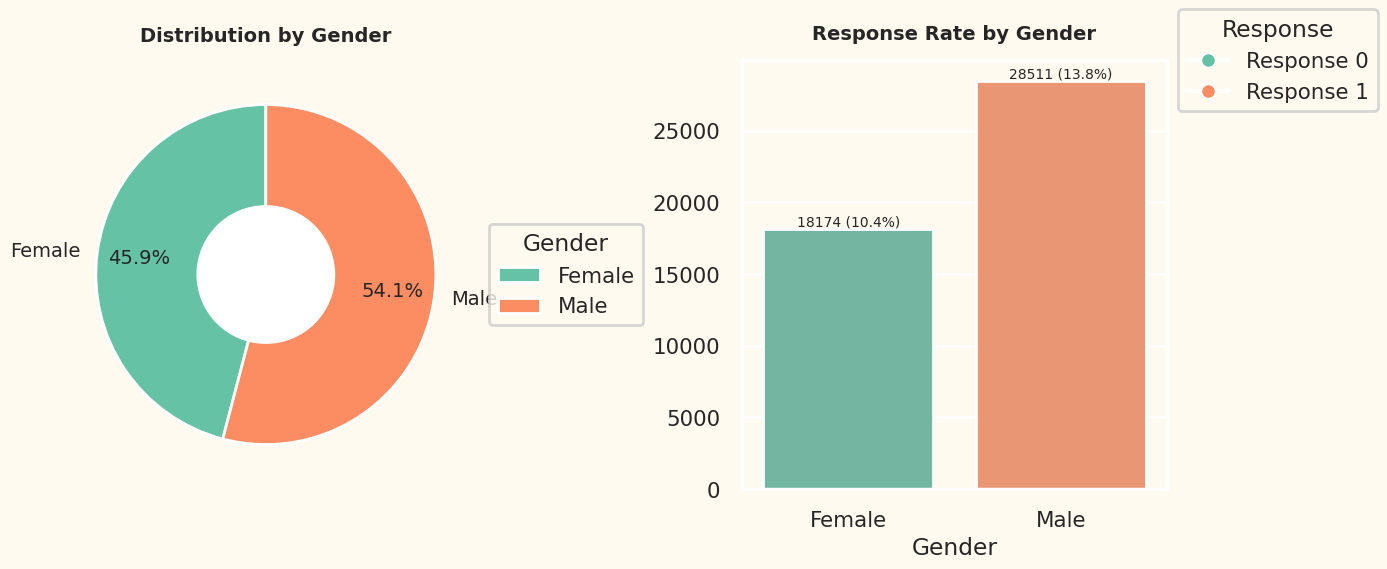

In [21]:
pie_bar_plot(train_df, 'Gender', 'Response')

## **Analyzing Response by Vehicle_Age**

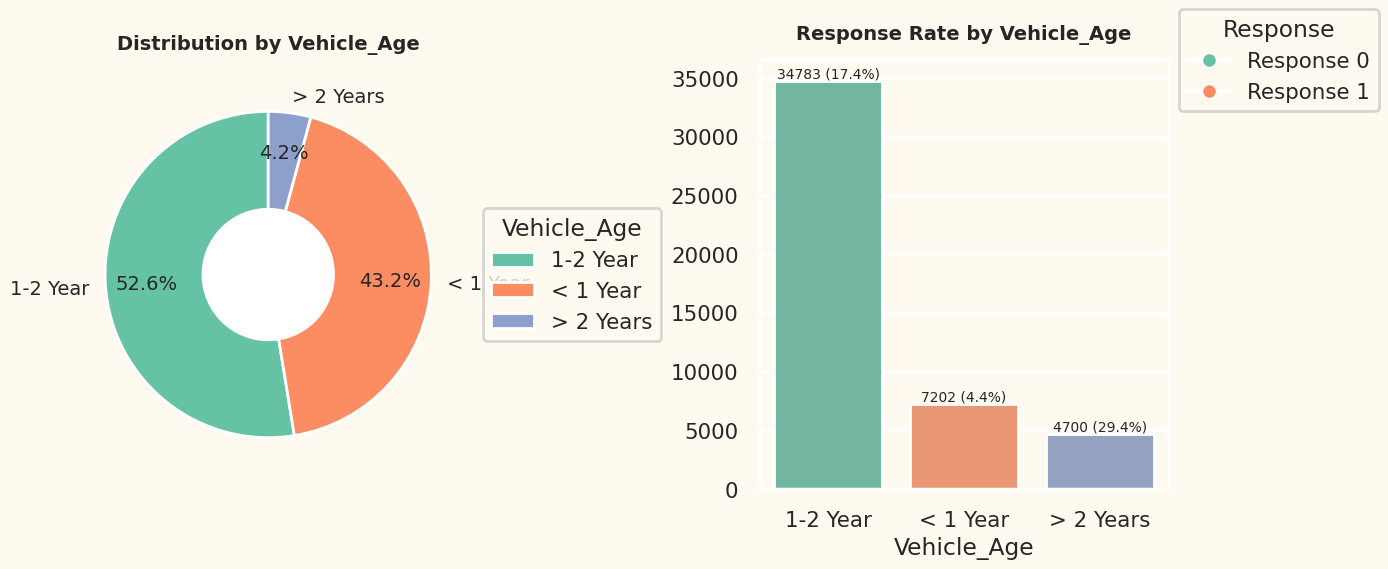

In [22]:
pie_bar_plot(train_df, 'Vehicle_Age', 'Response')

## **Analyzing Response by Vehicle_Damage**

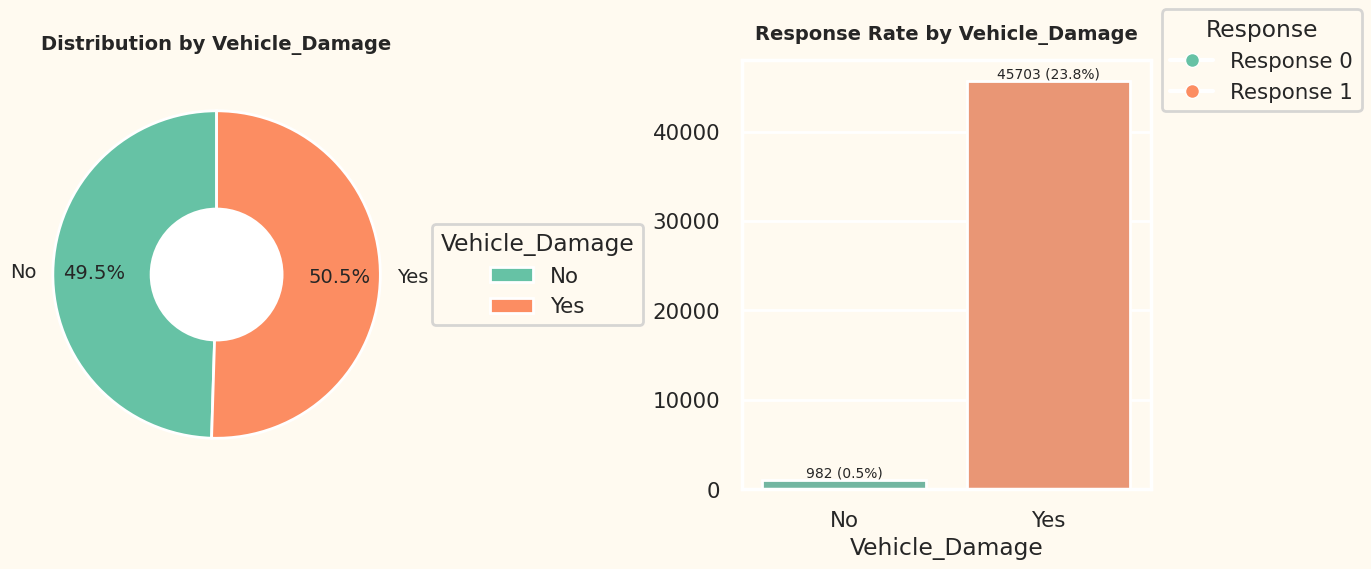

In [23]:
pie_bar_plot(train_df, 'Vehicle_Damage', 'Response')


## **Analyzing Response by Driving_License**

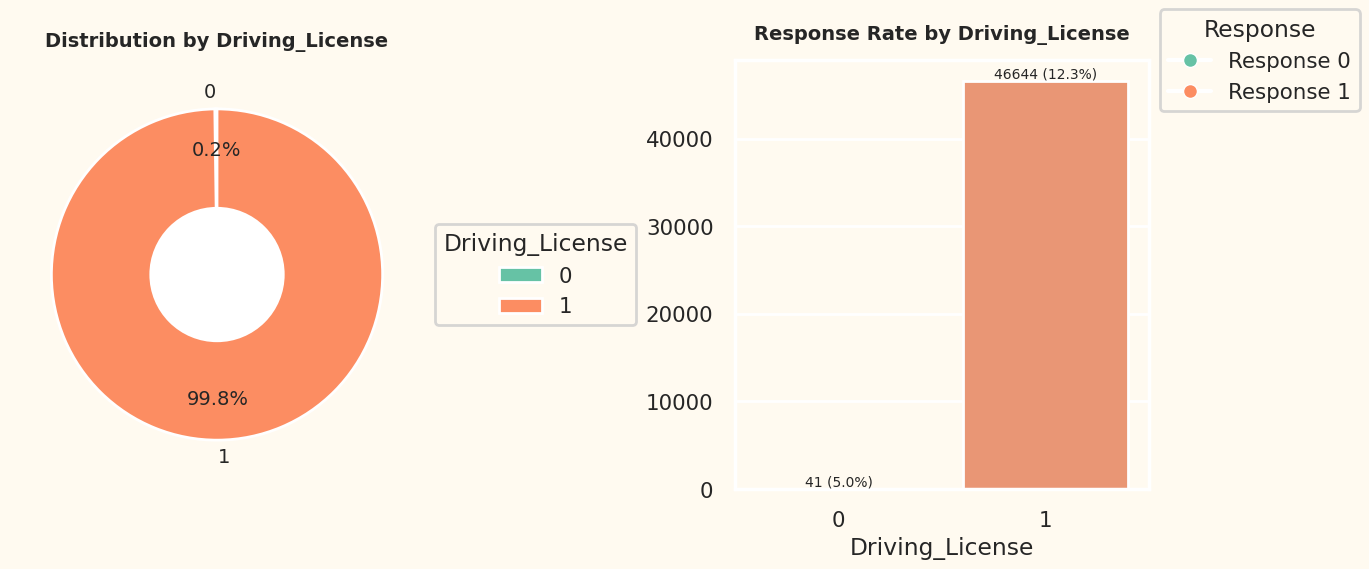

In [24]:
pie_bar_plot(train_df, 'Driving_License', 'Response')

## **Analyzing Response by Previously_Insured**

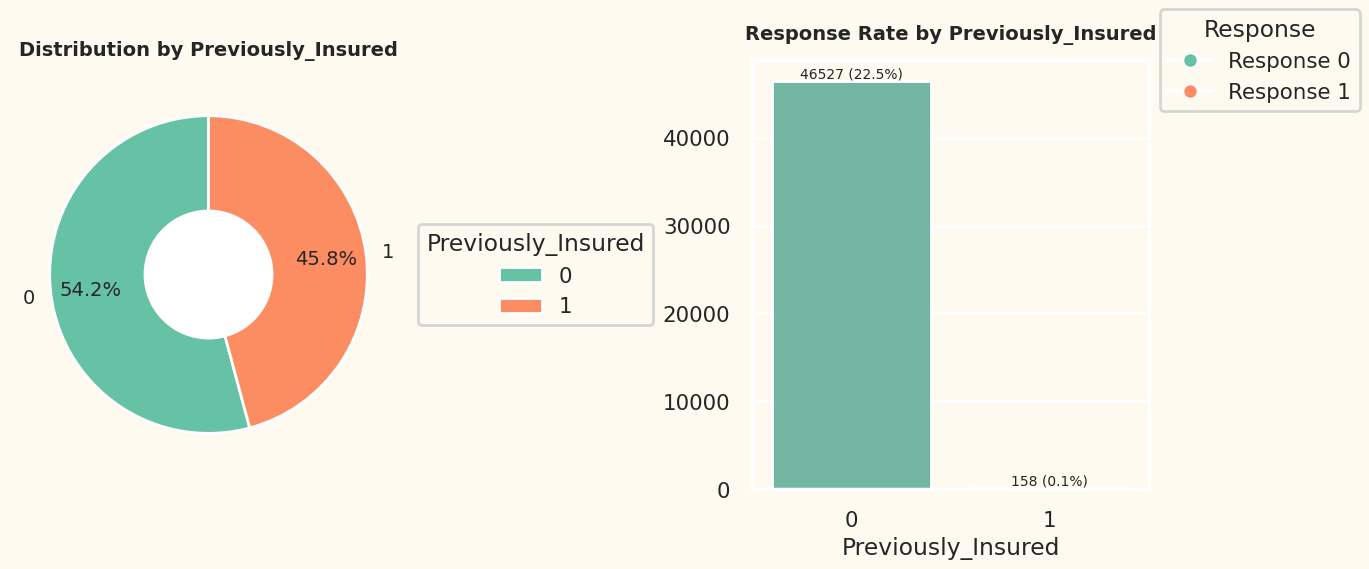

In [25]:
pie_bar_plot(train_df, 'Previously_Insured', 'Response')

# **Analyzing Response by Numerical col**

In [26]:
def hist_with_hue(df, col, response_col):
    plt.figure(figsize=(13.5, 6))

    # Convert integer attrition column to 'Yes' and 'No'
    df['response_label'] = np.where(df[response_col] == 1, 'Yes', 'No')

    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='response_label', data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='response_label', y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {response_col}", fontweight="black", size=14, pad=10)

    plt.tight_layout()
    plt.show()

## **Analyzing Response by Annual_Premium**

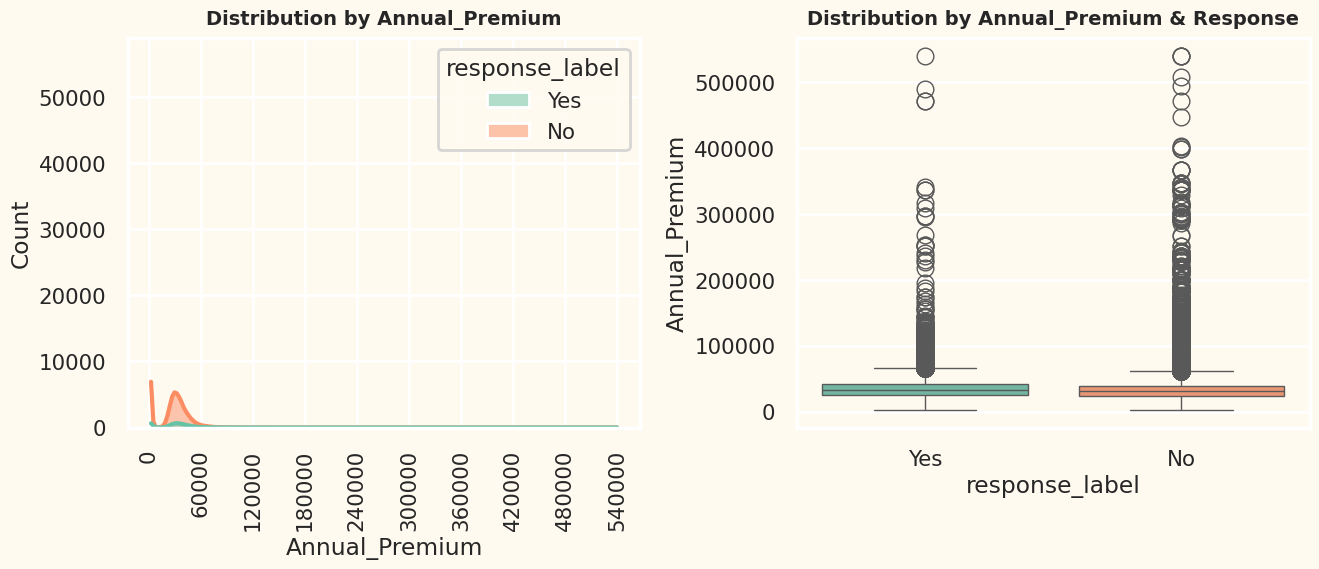

In [27]:
hist_with_hue(train_df, 'Annual_Premium', 'Response')

## **Analyzing Response by Region_Code**

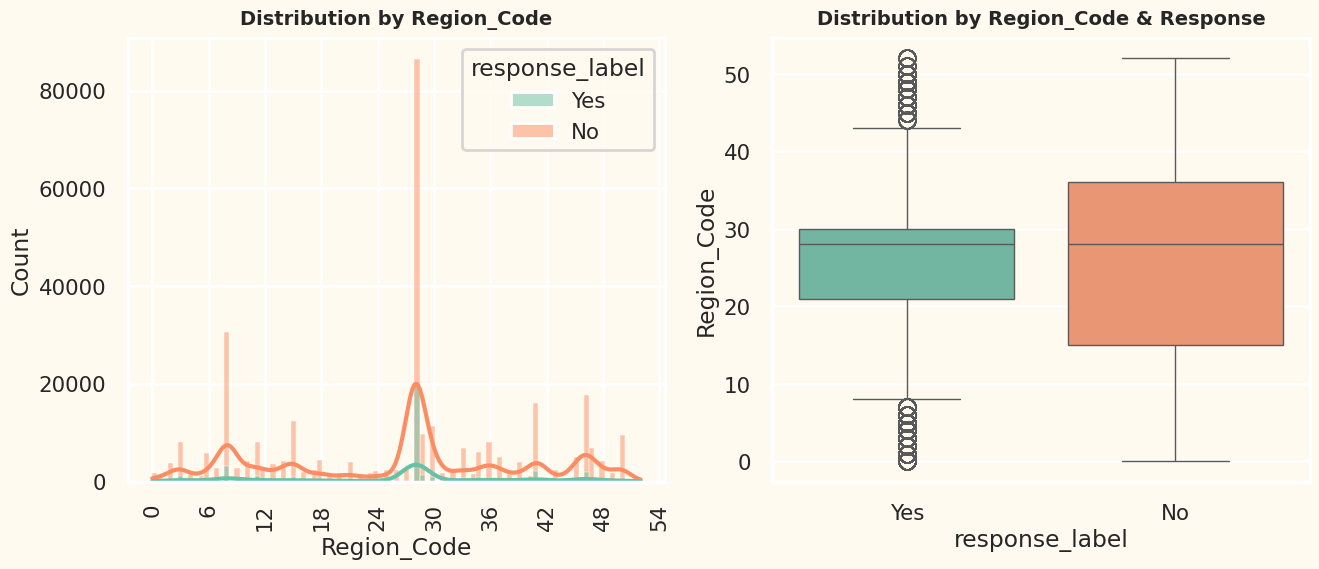

In [28]:
hist_with_hue(train_df, 'Region_Code', 'Response')

## **Analyzing Response by Policy_Sales_Channel**

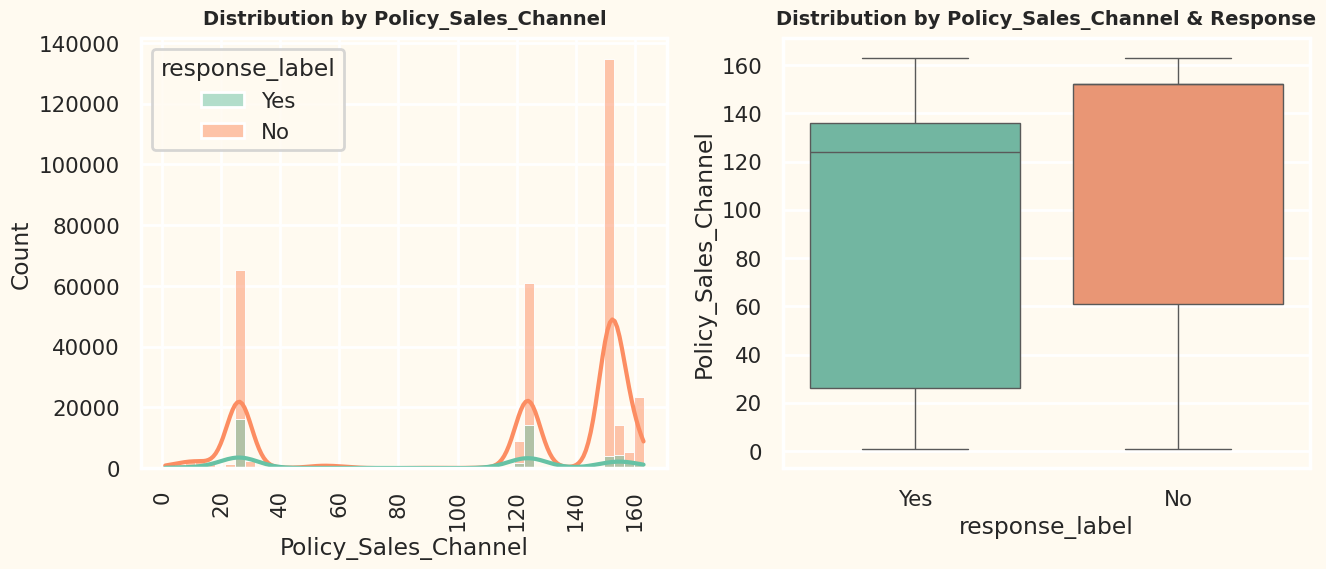

In [29]:
hist_with_hue(train_df, 'Policy_Sales_Channel', 'Response')

# **Analyzing Response by Vintage**

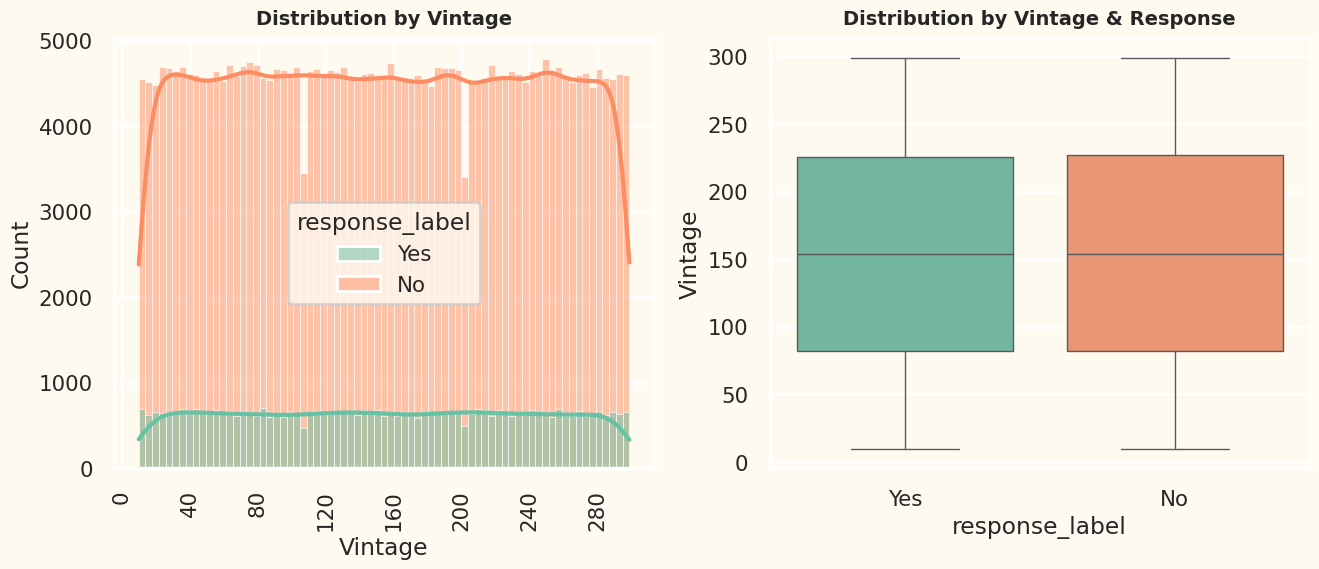

In [30]:
hist_with_hue(train_df, 'Vintage', 'Response')

In [31]:
train_df.drop(['response_label'],axis = 1,inplace = True)

# Statistical Analysis - Feature Importance

## **Performing ANOVA Test to Analyze the Numerical Features Importance in Insaurance cross selling**

In [32]:
num_cols = train_df.select_dtypes(np.number).columns

In [33]:
new_data = train_df.copy()

In [34]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Response"])

    f_scores[column] = f_score
    p_values[column] = p_value

## **visualizing the F_Score of ANOVA Test of Each Numerical features.**

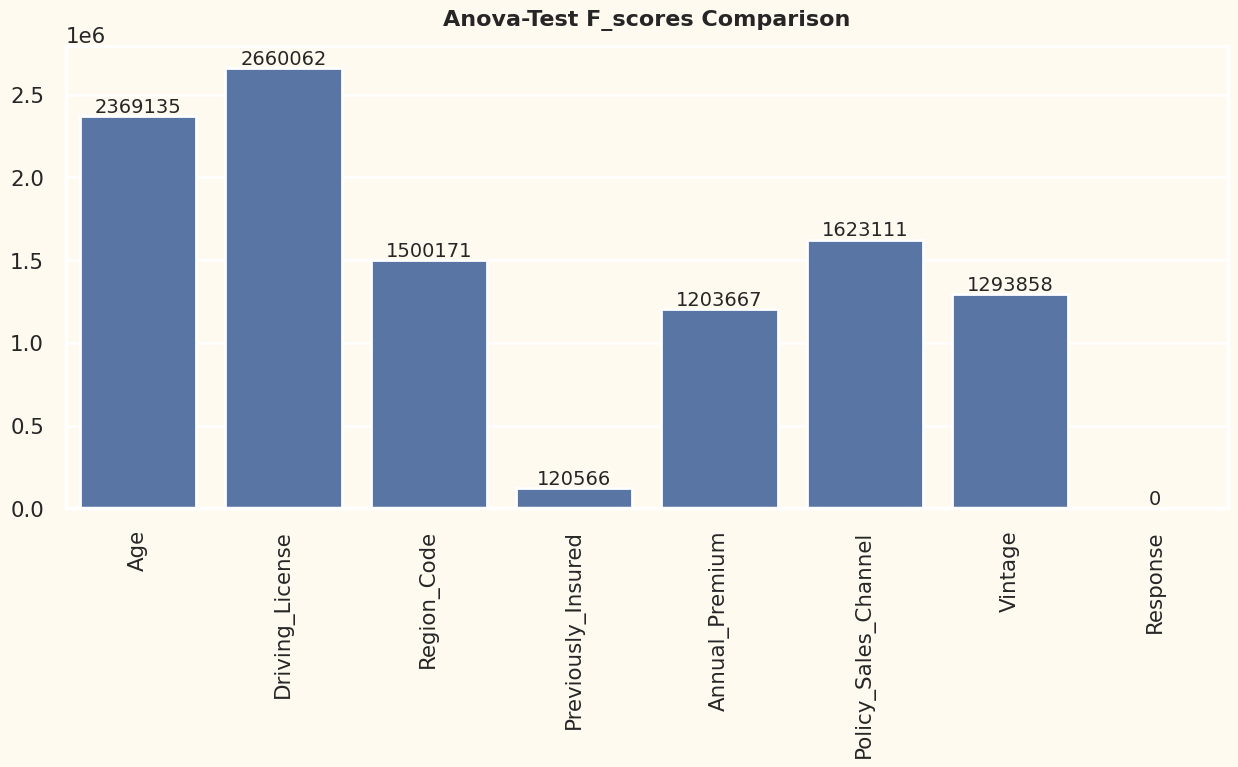

In [35]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

## **Comparing F_Score and P_value of ANOVA Test.**

In [36]:
annova_data = pd.DataFrame({"Features":keys,"F_Score":values})
annova_data["P_value"] = [format(p, '.20f') for p in list(p_values.values())]
annova_data

,Features,F_Score,P_value
0,Age,2.369136e+06,0.00000000000000000000
1,Driving_License,2.660063e+06,0.00000000000000000000
2,Region_Code,1.500172e+06,0.00000000000000000000
3,Previously_Insured,1.205669e+05,0.00000000000000000000
4,Annual_Premium,1.203668e+06,0.00000000000000000000
5,Policy_Sales_Channel,1.623111e+06,0.00000000000000000000
6,Vintage,1.293858e+06,0.00000000000000000000
7,Response,6.608811e-30,1.00000000000000000000


## **Performing Chi-Square Test to Analyze the Categorical Feature Importance in INsaurance cross selling.**

In [37]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [38]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(train_df[col], train_df['Response'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

## **Visualizing the Chi-Square Statistic Values of Each Categorical Features.**

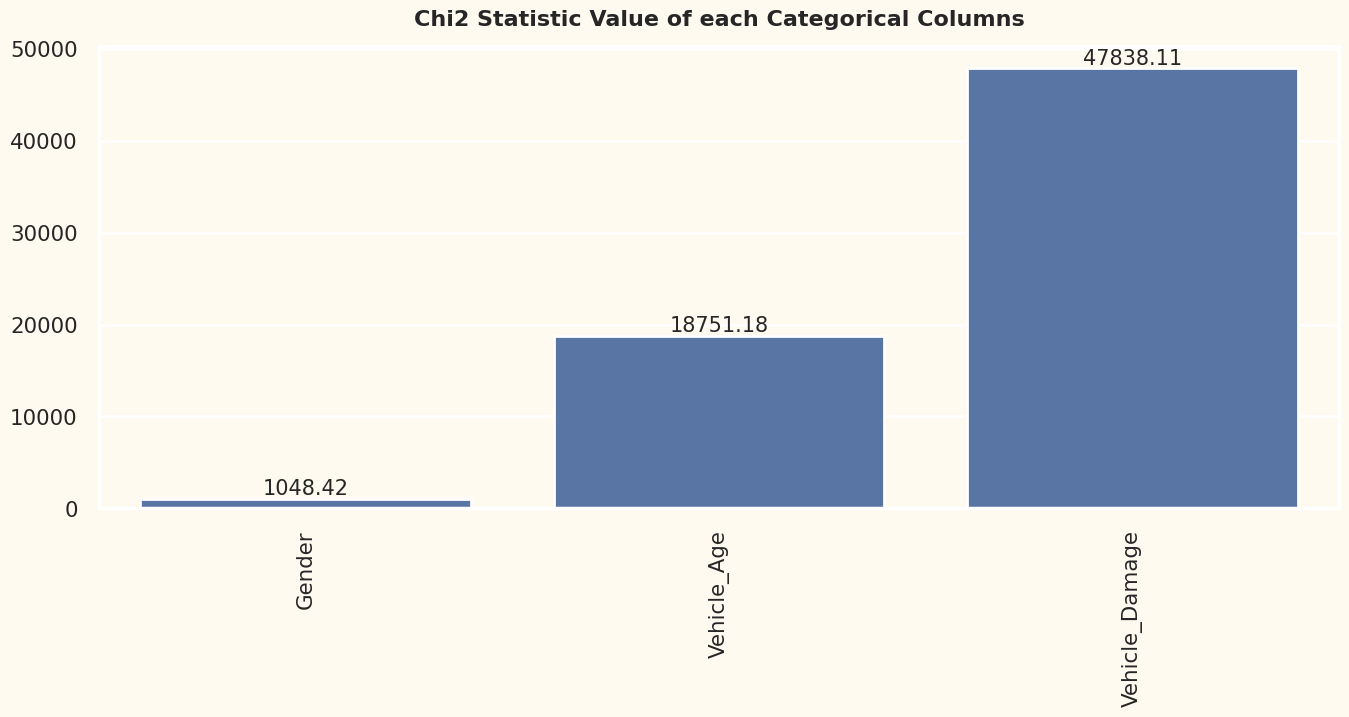

In [39]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

## **Compairing Chi2_Statistic and P_value of Chi_Square Test.**

In [40]:
chi_data = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
chi_data["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]
chi_data

,Features,Chi_2 Statistic,P_value
0,Gender,1048.415655,0.00000000000000000000
1,Vehicle_Age,18751.181408,0.00000000000000000000
2,Vehicle_Damage,47838.110289,0.00000000000000000000


## **Checking for outliers**

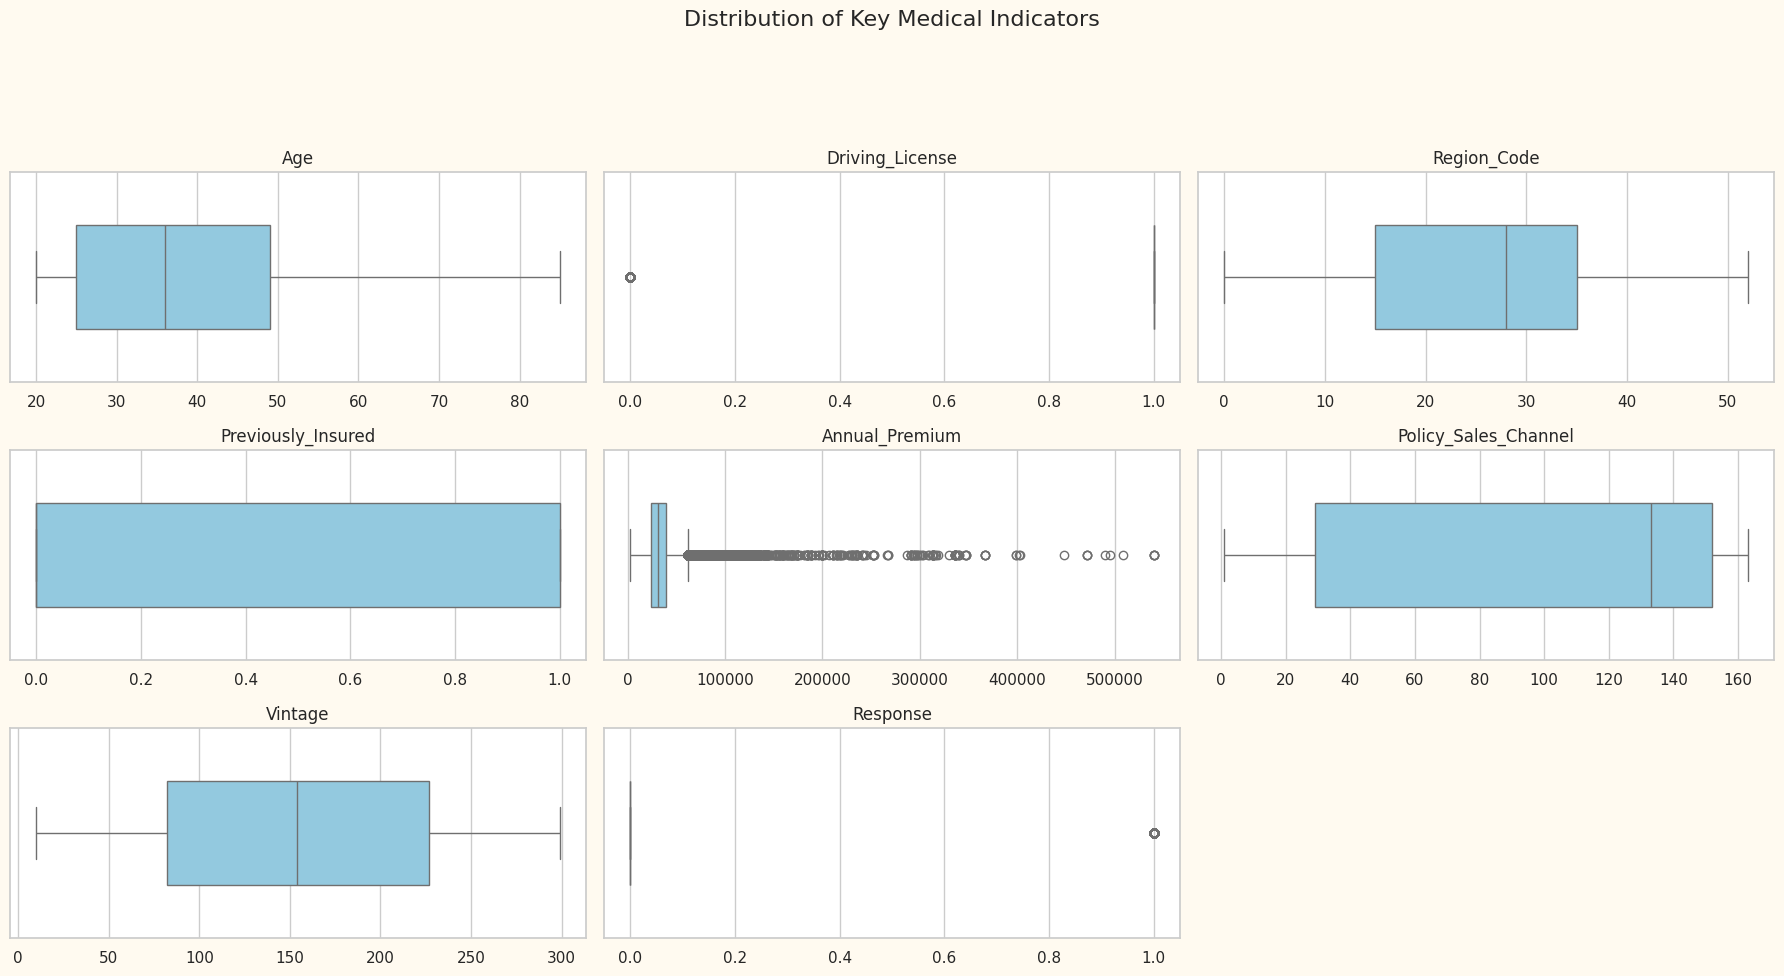

In [41]:
import math

numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Number of numerical columns
num_columns = len(test_df.columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [42]:
numerical_columns = ['Annual_Premium']

In [43]:
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

## **Visualising Data Distribution and Skewness**

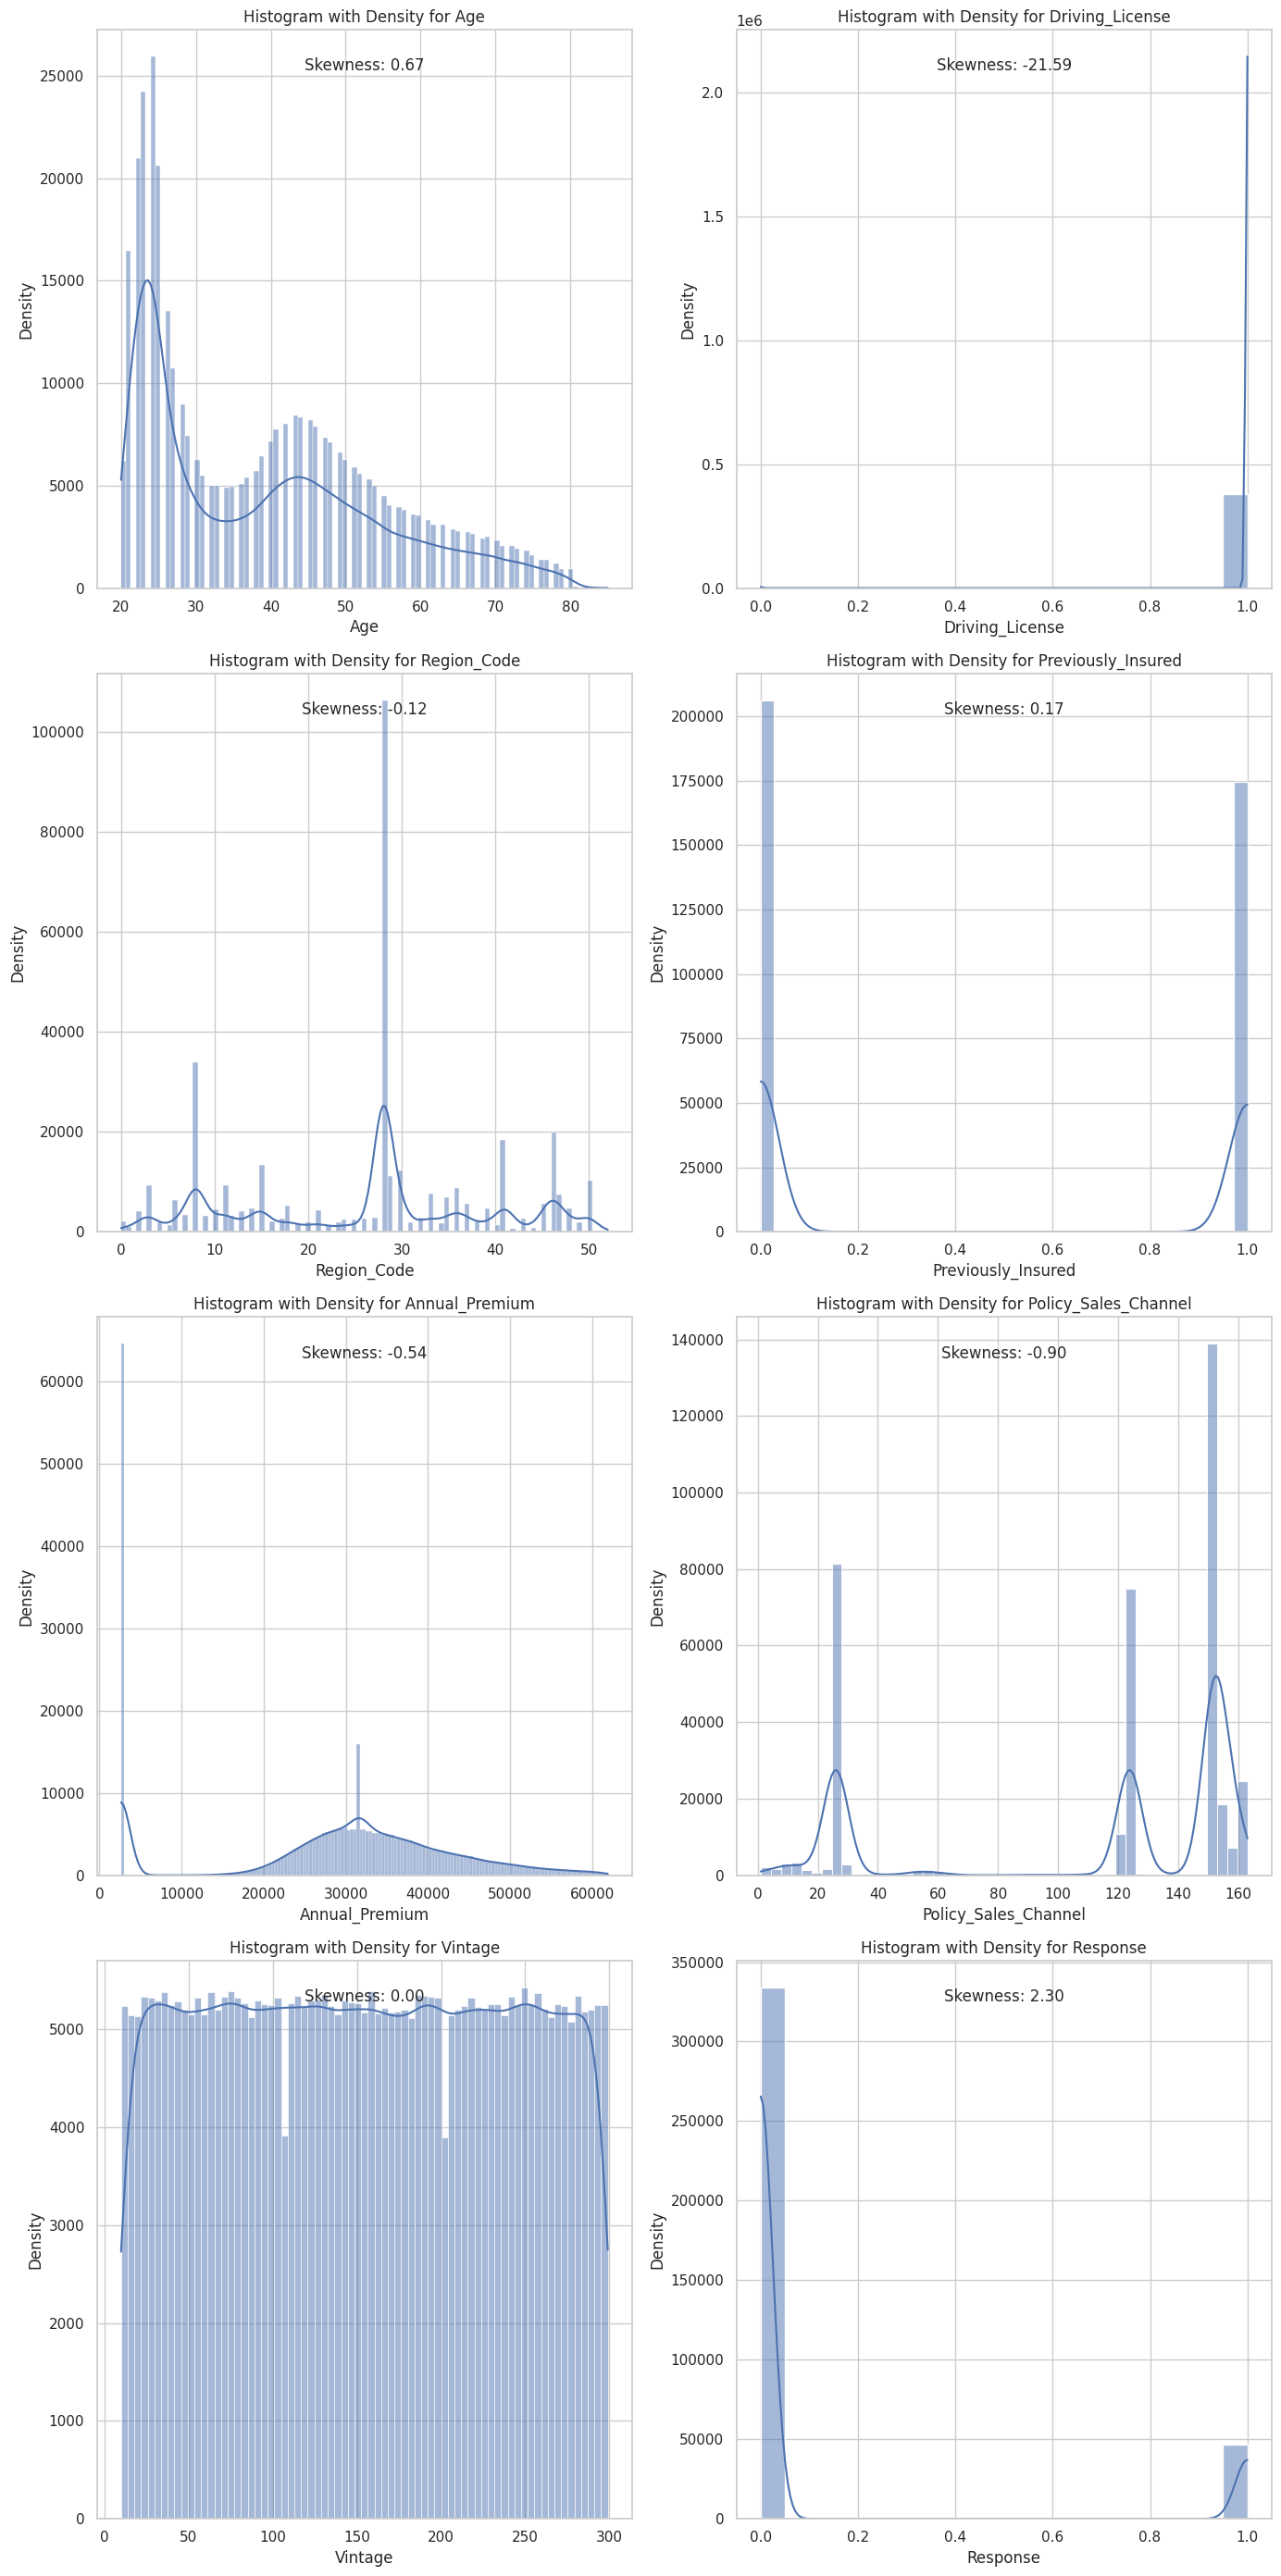

In [44]:
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Preprocessing

## **Featutre Engineering**

In [45]:
def generate_features(df):

    df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

    # Age Group
    bins = [0, 25, 50, 100]
    labels = ['young', 'middle-aged', 'senior']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

    # Insurance Damage History
    df['insurance_damage_history'] = df['Previously_Insured'].astype(str) + '_' + df['Vehicle_Damage']
    df = pd.get_dummies(df, columns=['insurance_damage_history'], drop_first=True)

    # Vehicle Age Category
    df['vehicle_age_category'] = df['Vehicle_Age'].map({'< 1 Year': 'new', '1-2 Year': 'medium', '> 2 Years': 'old'})

    # Premium per Day
    df['premium_per_day'] = df['Annual_Premium'] / df['Vintage']

    # Policy Channel Popularity
    policy_channel_popularity = df['Policy_Sales_Channel'].value_counts().to_dict()
    df['policy_channel_popularity'] = df['Policy_Sales_Channel'].map(policy_channel_popularity)

    # Premium Vintage Ratio
    df['premium_vintage_ratio'] = df['Annual_Premium'] / df['Vintage']

    df['Prev_Insured_Annual_Premium'] = pd.factorize(df['Previously_Insured'].astype(str) + df['Annual_Premium'].astype(str))[0]
    df['Prev_Insured_Vehicle_Age'] = pd.factorize(df['Previously_Insured'].astype(str) + df['Vehicle_Age'].astype(str))[0]
    df['Prev_Insured_Vehicle_Damage'] = pd.factorize(df['Previously_Insured'].astype(str) + df['Vehicle_Damage'].astype(str))[0]
    df['Prev_Insured_Vintage'] = pd.factorize(df['Previously_Insured'].astype(str) + df['Vintage'].astype(str))[0]


    # Convert boolean columns to integers (0 and 1)
    boolean_columns = df.select_dtypes(include=['bool']).columns
    df[boolean_columns] = df[boolean_columns].astype(int)

    return df

In [46]:
train_df = generate_features(train_df)

In [47]:
test_df = generate_features(test_df)

In [48]:
col = ['Vehicle_Age']
train_df.drop(col,axis = 1,inplace = True)
test_df.drop(col,axis = 1,inplace = True)

## **feature Encoding**

In [49]:
# Checking Unique entries in Train_df
cat_cols = test_df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(test_df[column]))

Unique values of  Vehicle_Damage {'Yes', 'No'}
Unique values of  vehicle_age_category {'old', 'new', 'medium'}


In [50]:
Vehicle_Damage_mapping = {'No':0, 'Yes':1}
vehicle_age_category_mapping = {'old':0,'medium':1,'new':2}

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(Vehicle_Damage_mapping)
train_df['vehicle_age_category'] = train_df['vehicle_age_category'].map(vehicle_age_category_mapping)

test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].map(Vehicle_Damage_mapping)
test_df['vehicle_age_category'] = test_df['vehicle_age_category'].map(vehicle_age_category_mapping)

## **Handling Skewness**

In [51]:
def transform(X):
    eps = 1e-5
    numerical_columns = ['Age','Annual_Premium','Policy_Sales_Channel','Vintage','premium_per_day','policy_channel_popularity','premium_vintage_ratio']

    for col in numerical_columns:

        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col]) - X[col] + eps)
        else:  # Symmetric or zero skew
            pass  # No transformation needed

    return X

In [52]:
train_df = transform(train_df)

In [53]:
test_df = transform(test_df)

In [54]:
train_df.head(5)

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,age_group_middle-aged,age_group_senior,insurance_damage_history_0_Yes,insurance_damage_history_1_No,insurance_damage_history_1_Yes,vehicle_age_category,premium_per_day,policy_channel_popularity,premium_vintage_ratio,Prev_Insured_Annual_Premium,Prev_Insured_Vehicle_Age,Prev_Insured_Vehicle_Damage,Prev_Insured_Vintage
0,3.784190,1,28.0,0,1,9.972407,4.919981,5.379897,1,1,1,0,1,0,0,0,5.228024,10.915706,5.228024,0,0,0,0
1,4.330733,1,3.0,0,0,10.252206,4.919981,5.209486,0,1,0,1,0,0,0,1,5.210889,10.915706,5.210889,1,1,1,1
2,3.850148,1,28.0,0,1,10.068451,4.919981,3.295837,1,1,1,0,1,0,0,0,7.257212,10.915706,7.257212,2,0,0,2
3,3.044523,1,11.0,1,0,10.412171,2.397896,5.313206,0,1,0,0,0,1,0,2,4.948620,-11.512925,4.948620,3,2,2,3
4,3.367296,1,41.0,1,0,10.445376,2.397896,3.663562,0,0,1,0,0,1,0,2,6.558234,-11.512925,6.558234,4,2,2,4


## **checking Highly Correlated Features**

<Axes: title={'center': 'Correlation Plot'}>

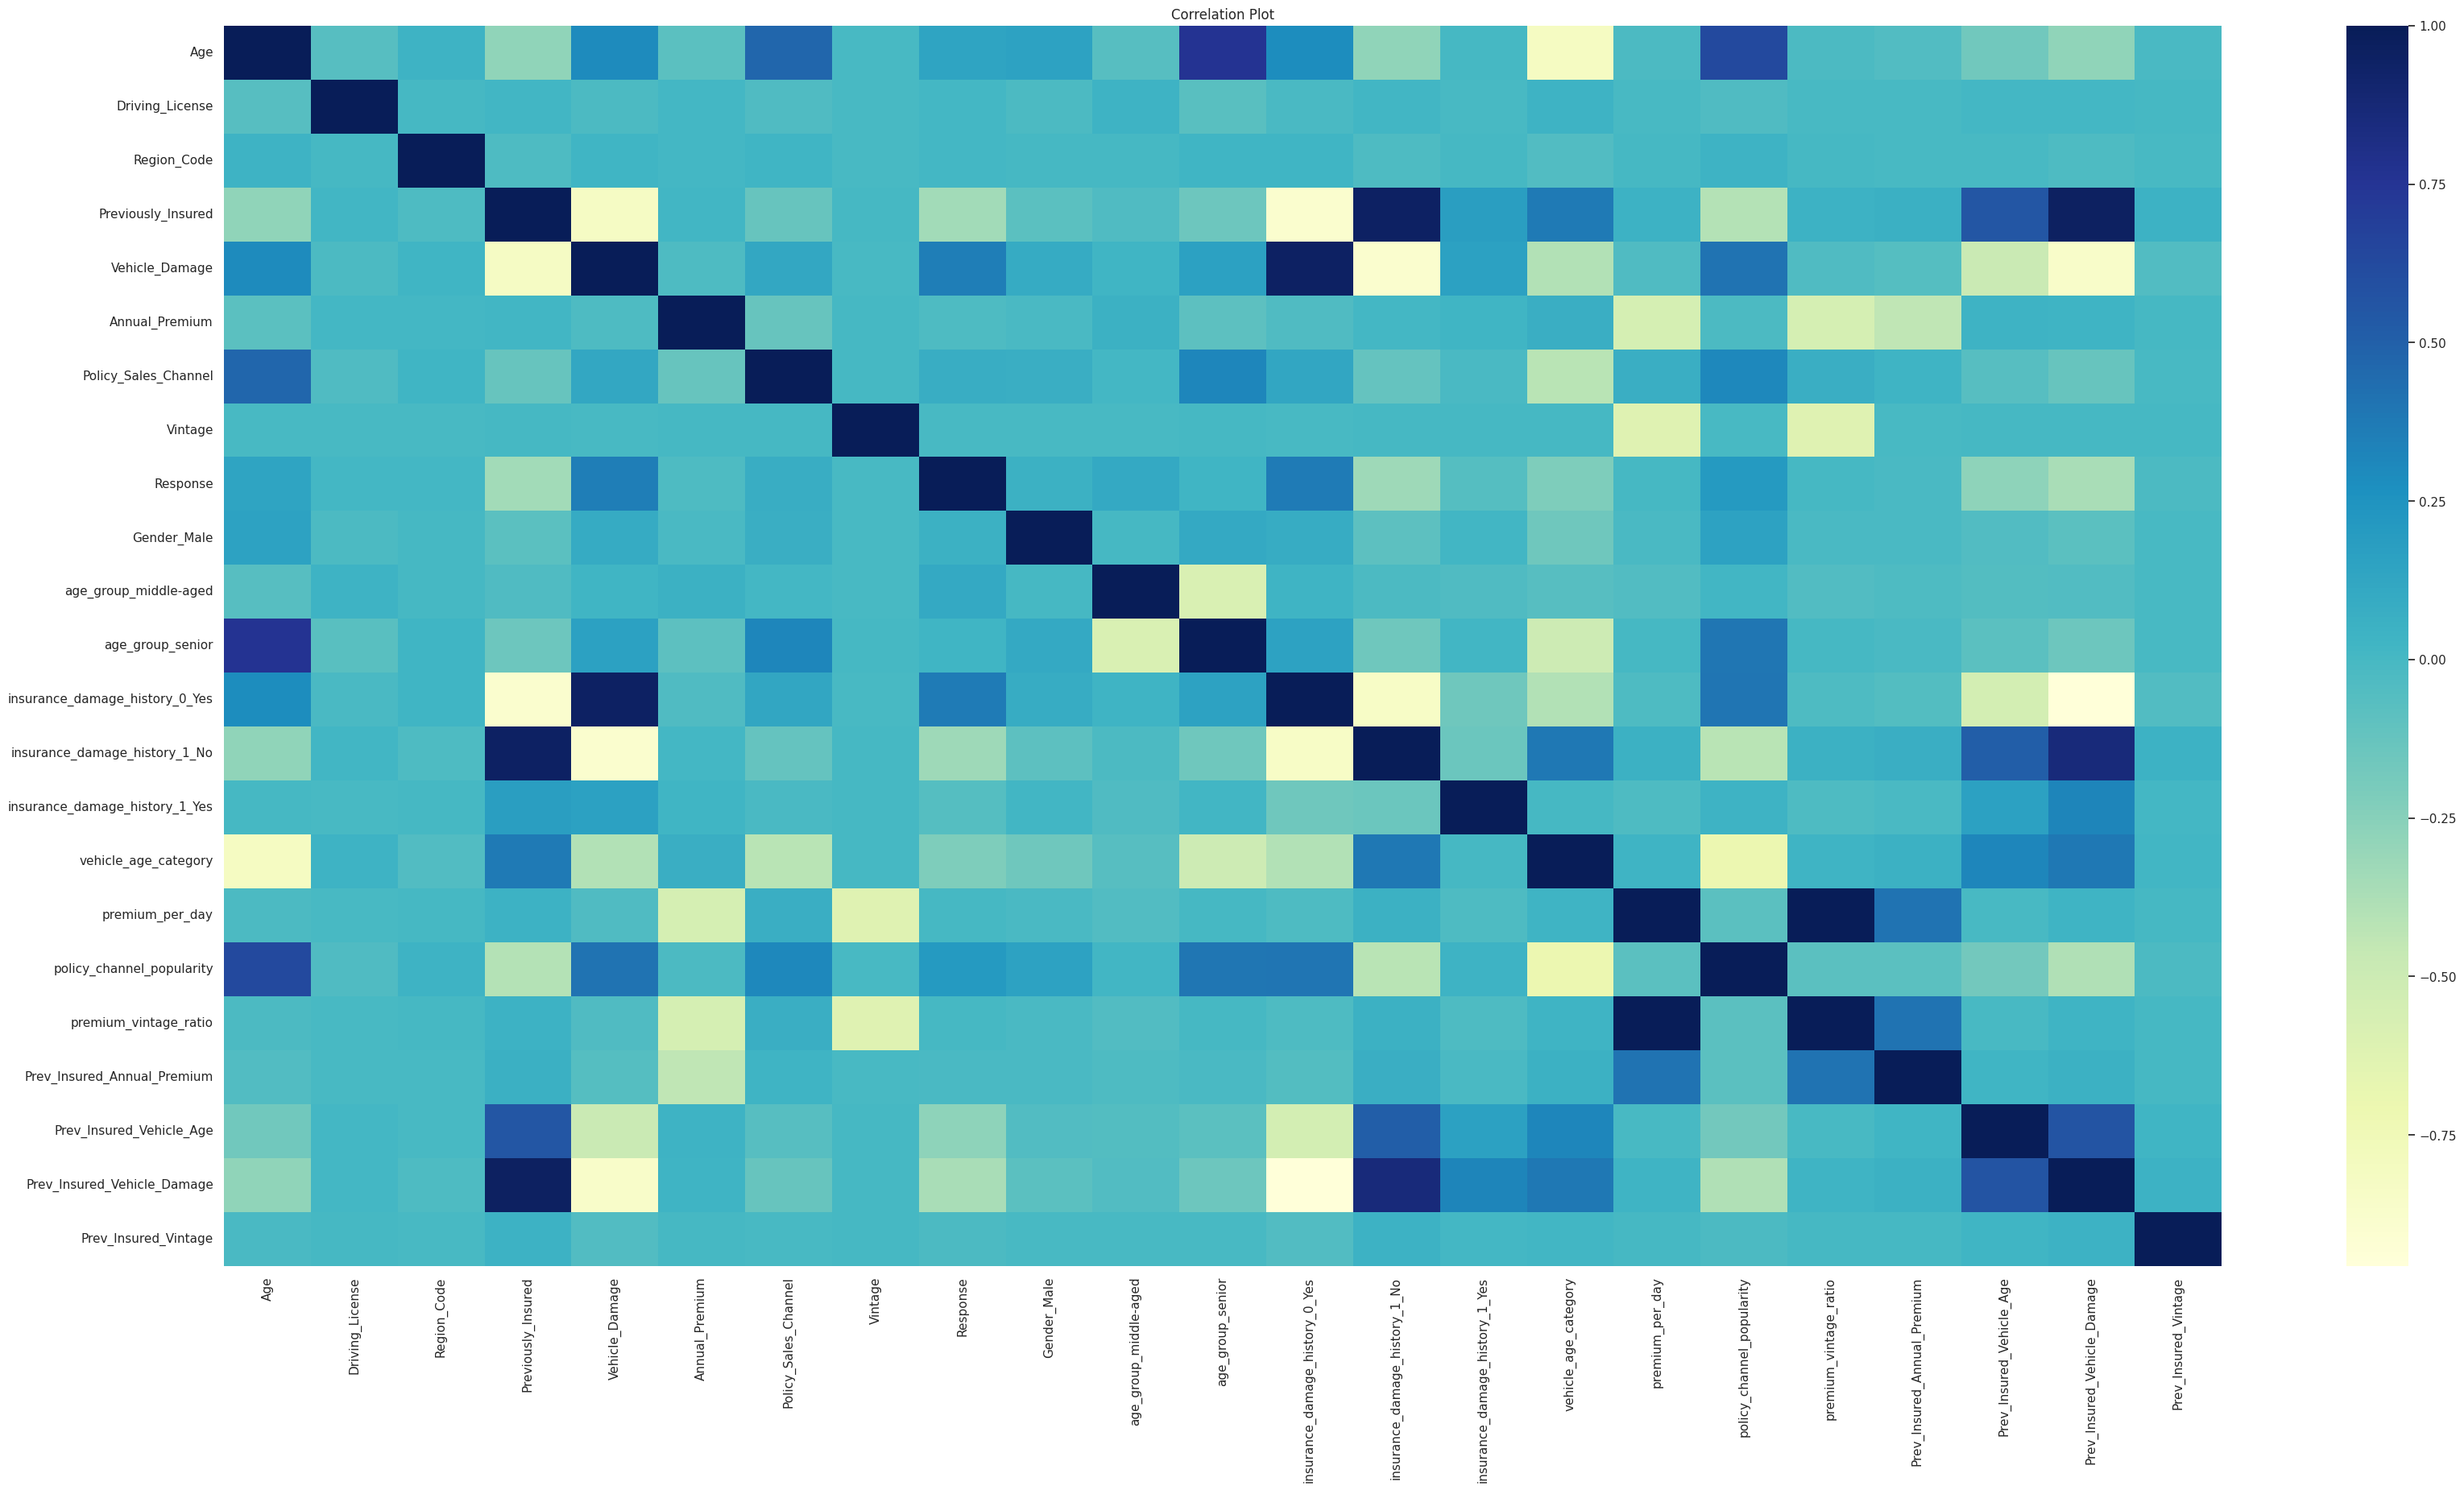

In [55]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [56]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
Age and age_group_senior
Previously_Insured and insurance_damage_history_1_No
Previously_Insured and Prev_Insured_Vehicle_Damage
Vehicle_Damage and insurance_damage_history_0_Yes
insurance_damage_history_1_No and Prev_Insured_Vehicle_Damage
premium_per_day and premium_vintage_ratio


##**Splitting the features in dependent and independent features**

In [57]:
x = train_df.drop(['Response'], axis=1)
y = train_df['Response']

In [58]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert y to a NumPy array if it's not already one
arr = np.array(y)

# Calculate unique classes in y
unique_classes = np.unique(arr)

# Calculate class weights based on the training data
# Pass unique_classes directly as it's already a NumPy array
class_weights = compute_class_weight('balanced',
                                     classes=unique_classes, # Changed to unique_classes
                                     y=y)

# Create a dictionary of class weights
class_weights_dict = dict(zip(unique_classes, class_weights))
print(class_weights_dict)

{0: 0.5698553066690608, 1: 4.078826175431081}


In [59]:
class_weights_dict = {0: 0.5724371562039414, 1: 3.9512674585974015}

## **Applying SMOTE to balance the data**

In [60]:
print("Before resampling:", y.value_counts())
print()

Before resampling: Response
0    334155
1     46685
Name: count, dtype: int64



In [61]:
from imblearn.under_sampling import RandomUnderSampler

# Define the desired number of samples for each class
desired_count = 46685

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

undersample = RandomUnderSampler(random_state=42,sampling_strategy=undersample_strategy)
x_res, y_res = undersample.fit_resample(x, y)

In [62]:
print("After resampling:", y_res.value_counts())


After resampling: Response
0    46685
1    46685
Name: count, dtype: int64


## **Checking Feature Importance**

In [63]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [64]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,Prev_Insured_Vehicle_Damage,0.093342
1,Prev_Insured_Vehicle_Age,0.089103
2,insurance_damage_history_0_Yes,0.087512
3,Previously_Insured,0.083528
4,Prev_Insured_Annual_Premium,0.082445
5,Vehicle_Damage,0.081588
6,Prev_Insured_Vintage,0.080785
7,insurance_damage_history_1_No,0.078535
8,Policy_Sales_Channel,0.041924
9,policy_channel_popularity,0.038780


In [65]:
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['age_group_middle-aged',
 'insurance_damage_history_1_Yes',
 'Gender_Male',
 'Driving_License',
 'age_group_senior',
 'Annual_Premium',
 'premium_per_day',
 'premium_vintage_ratio',
 'Vintage']

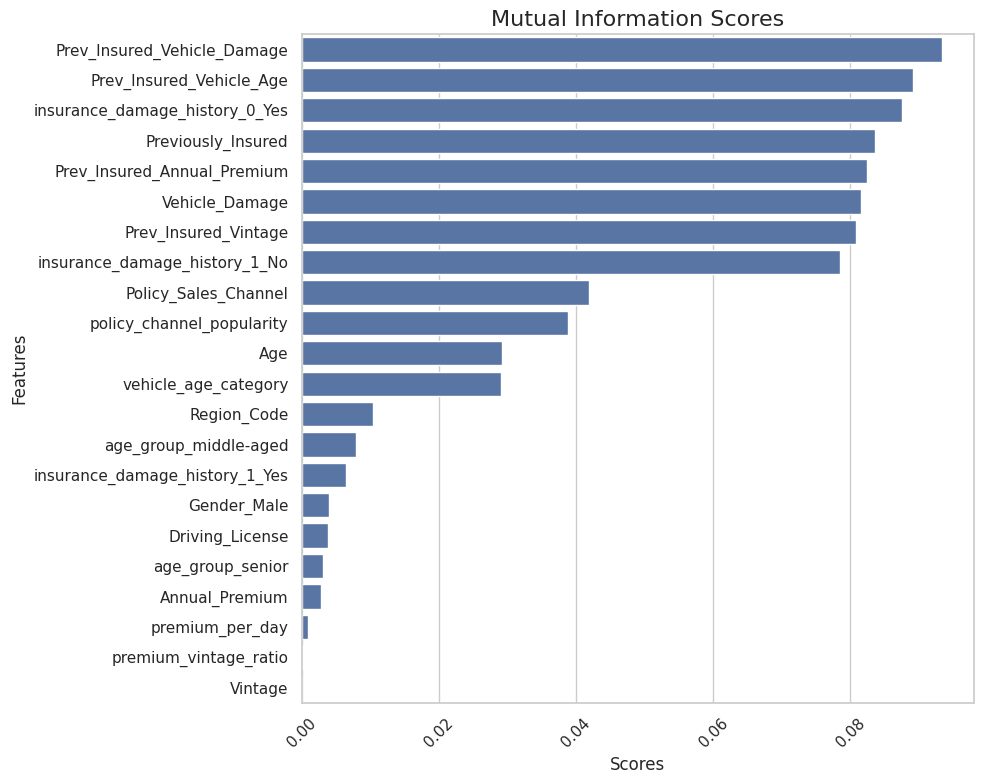

In [66]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

## **Dividing in train-test-split**

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model building

In [68]:
Training_Accuracy = []
Testing_Accuracy = []

# For scaled data
def model_prediction(model, x, y, n_splits, random_state):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    training_score = []
    testing_score = []
    precision = []
    recall = []
    f1_score_ = []

    x = pd.DataFrame(x)  # Convert x to DataFrame

    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
        c = precision_score(y_test, x_test_pred, average='weighted')
        d = recall_score(y_test, x_test_pred, average='weighted')
        e = f1_score(y_test, x_test_pred, average='weighted')

        training_score.append(a)
        testing_score.append(b)
        precision.append(c)
        recall.append(d)
        f1_score_.append(e)

    # Display only final results after training
    print("\nFinal Results:")
    print(f"Mean Accuracy on Training Data: {np.mean(training_score):.2f}%")
    print(f"Mean Accuracy on Testing Data: {np.mean(testing_score):.2f}%")
    print(f"Mean Precision: {np.mean(precision):.2f}")
    print(f"Mean Recall: {np.mean(recall):.2f}")
    print(f"Mean F1 Score: {np.mean(f1_score_):.2f}")

    # Classification report and confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, x_test_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()

    # ROC-AUC Curve
    if hasattr(model, "predict_proba"):  # Ensure the model supports predict_proba
        print("\nROC - AUC Curve:")
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.figure(figsize=(8, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="green")
        plt.plot([0, 1], [0, 1], linestyle="--", color="black")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
    else:
        print("ROC-AUC cannot be computed as the model does not support predict_proba.")

    # Append the results for further analysis
    Training_Accuracy.append(np.mean(training_score))
    Testing_Accuracy.append(np.mean(testing_score))


## **XGBoost**

In [69]:
XGB_Model = XGBClassifier()


Final Results:
Mean Accuracy on Training Data: 88.19%
Mean Accuracy on Testing Data: 87.65%
Mean Precision: 0.83
Mean Recall: 0.88
Mean F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66831
           1       0.47      0.03      0.06      9337

    accuracy                           0.88     76168
   macro avg       0.68      0.51      0.50     76168
weighted avg       0.83      0.88      0.83     76168


Confusion Matrix:


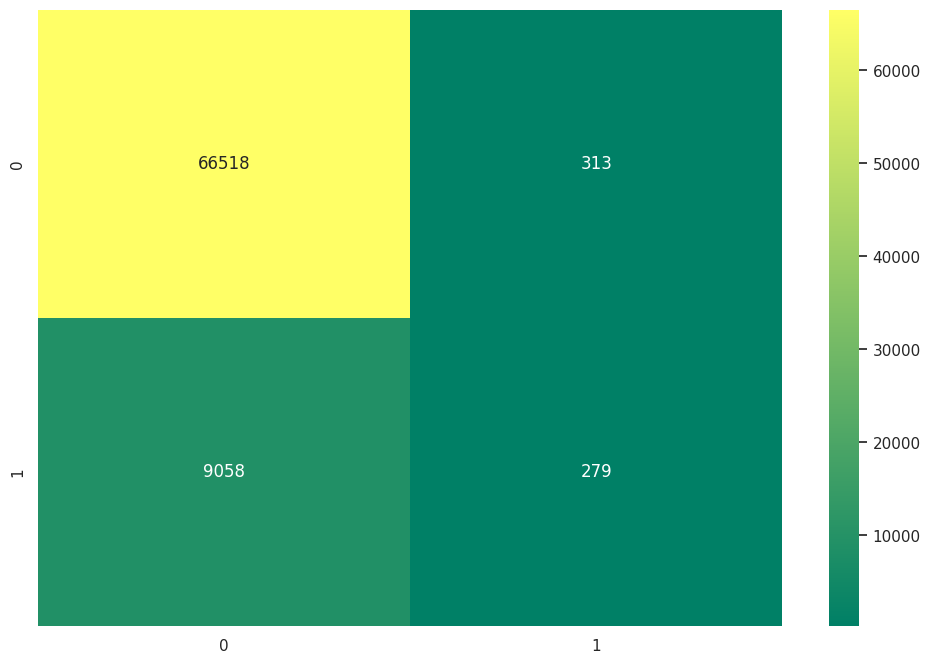


ROC - AUC Curve:


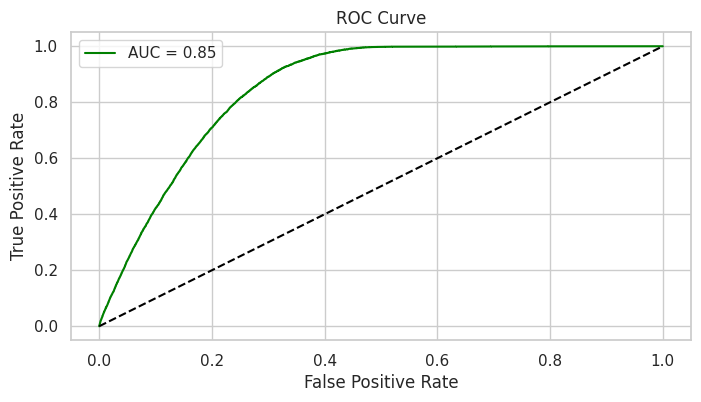

In [70]:
model_prediction(XGB_Model, x, y, n_splits=5, random_state=42)

## **CatBoost**

In [71]:
cb_model = CatBoostClassifier(verbose=False)




Final Results:
Mean Accuracy on Training Data: 88.38%
Mean Accuracy on Testing Data: 87.70%
Mean Precision: 0.83
Mean Recall: 0.88
Mean F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66831
           1       0.49      0.03      0.07      9337

    accuracy                           0.88     76168
   macro avg       0.68      0.51      0.50     76168
weighted avg       0.83      0.88      0.83     76168


Confusion Matrix:


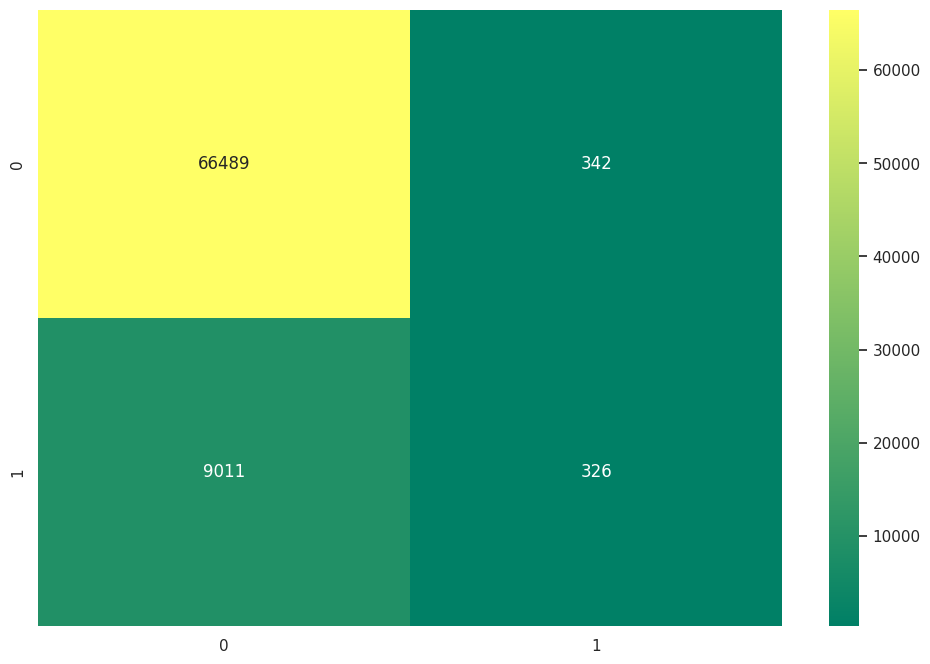


ROC - AUC Curve:


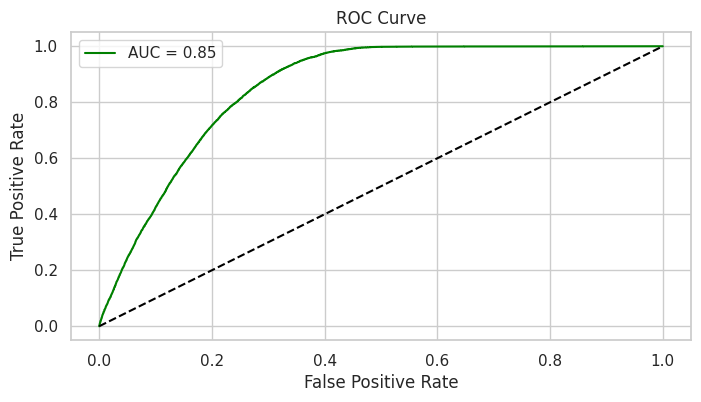

In [72]:
model_prediction(cb_model, x, y, n_splits=5, random_state=42)

In [73]:
LGBM_model = LGBMClassifier()

[LightGBM] [Info] Number of positive: 37348, number of negative: 267324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 304672, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122584 -> initscore=-1.968182
[LightGBM] [Info] Start training from score -1.968182
[LightGBM] [Info] Number of positive: 37348, number of negative: 267324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1910
[LightGBM] [Info] Number of data points in the train set: 304672, number of used features: 22
[LightGBM] [In

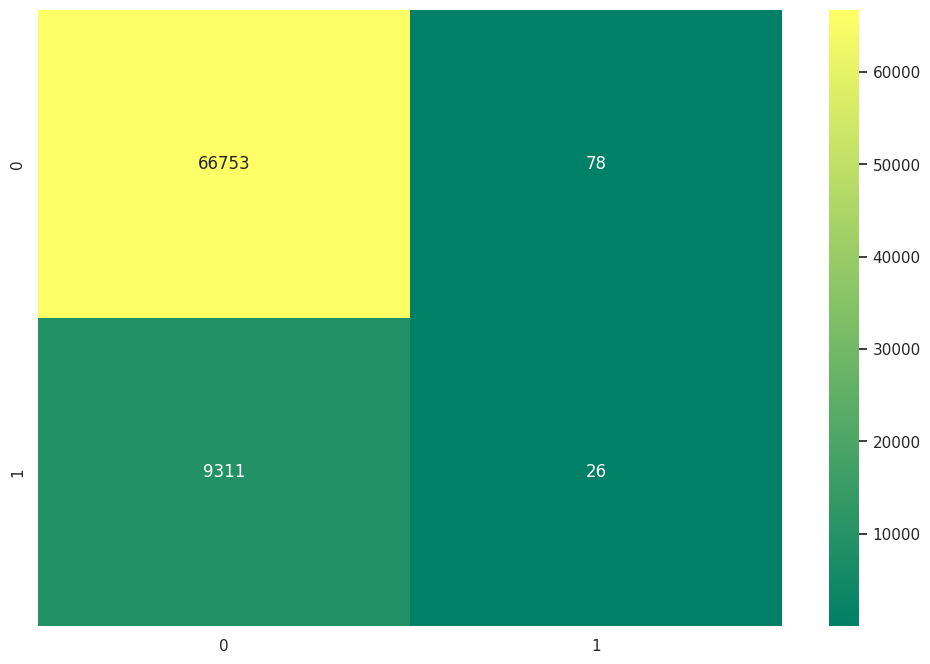


ROC - AUC Curve:


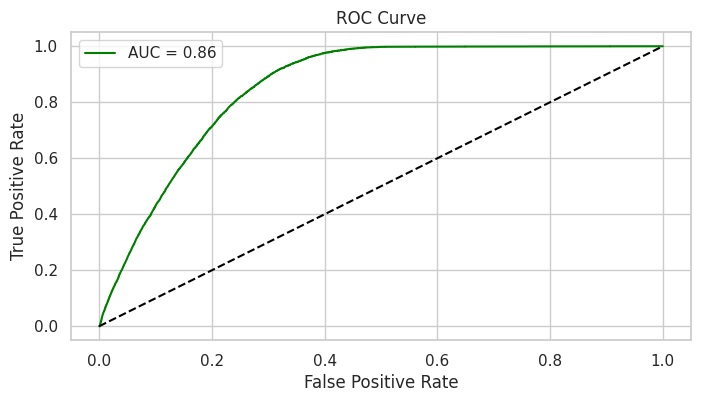

In [74]:
model_prediction(LGBM_model, x, y, n_splits=5, random_state=42)

In [75]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', XGB_Model),
        ('cb', cb_model),
        ('lgbm',LGBM_model)
    ],
    voting='soft',
    flatten_transform=True
)

[LightGBM] [Info] Number of positive: 37348, number of negative: 267324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 304672, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122584 -> initscore=-1.968182
[LightGBM] [Info] Start training from score -1.968182
[LightGBM] [Info] Number of positive: 37348, number of negative: 267324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1910
[LightGBM] [Info] Number of data points in the train set: 304672, number of used features: 22
[LightGBM] [In

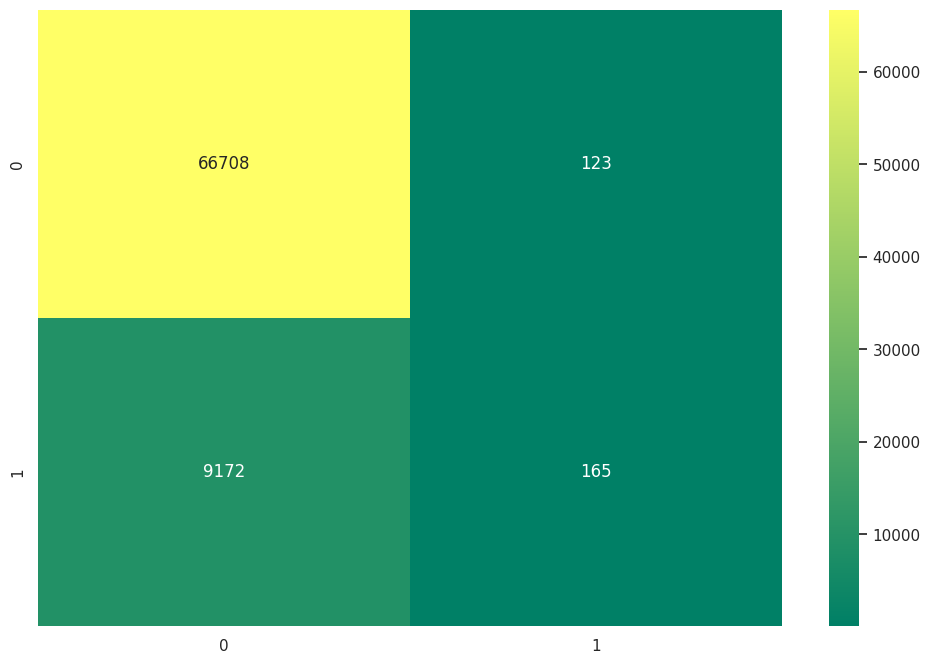


ROC - AUC Curve:


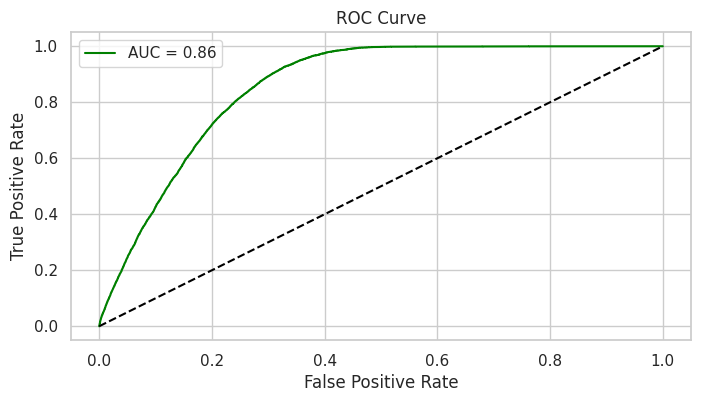

In [76]:
model_prediction(ensemble_model, x, y, n_splits=5, random_state=42)

## **Comparing Performance**

In [77]:
data = {
    'Model': ['XGB_Model','cb_model','LGBM_model','ensemble_model'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [78]:
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

,Model,Training_Accuracy,Testing_Accuracy
0,ensemble_model,88.031982,87.758901
1,cb_model,88.379831,87.695095
2,LGBM_model,87.766122,87.694045
3,XGB_Model,88.185393,87.653083


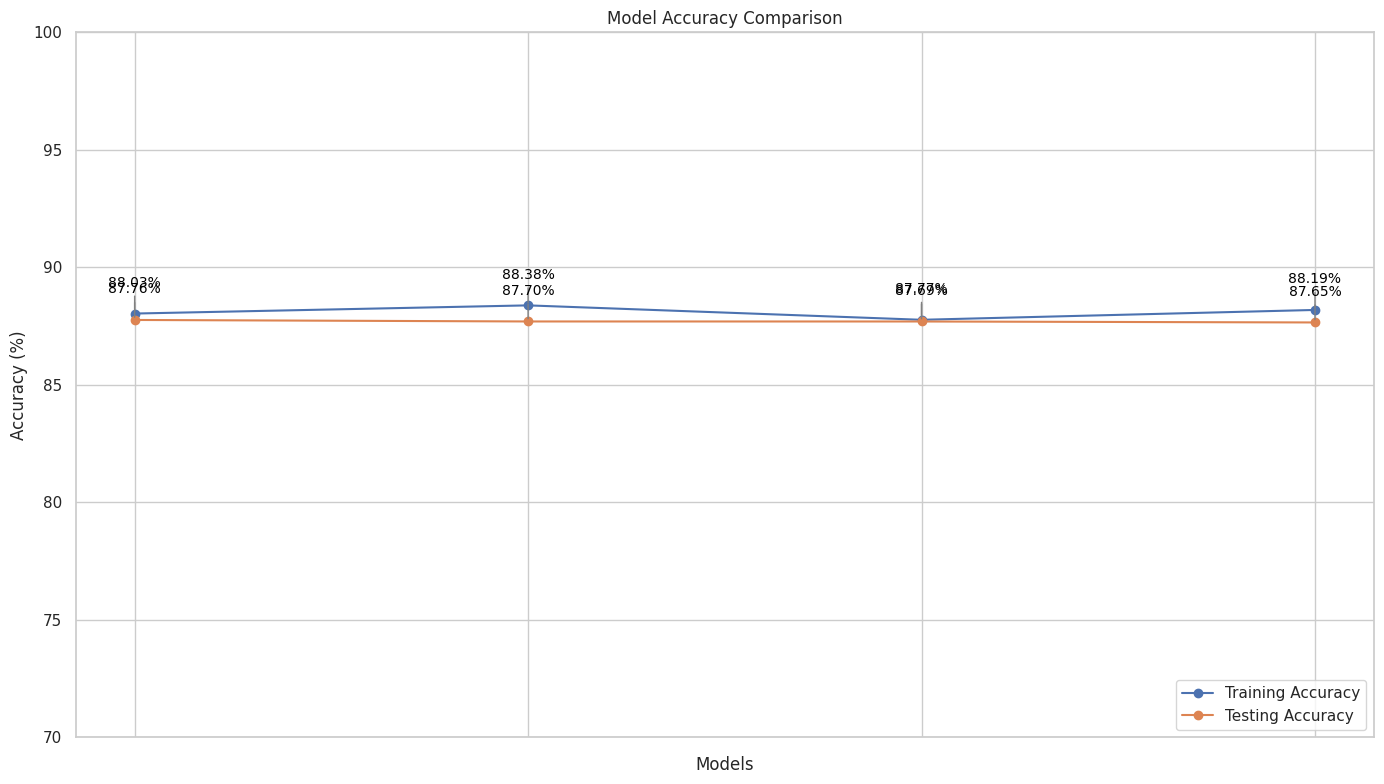

In [79]:
# Plot the DataFrame
fig, ax = plt.subplots(figsize=(14, 8))
Acc_df.plot(x='Model', y=['Training_Accuracy', 'Testing_Accuracy'], marker='o', linestyle='-', ax=ax)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)

# Annotate training accuracy
for i, accuracy in enumerate(Acc_df['Training_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Annotate testing accuracy
for i, accuracy in enumerate(Acc_df['Testing_Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))

# Remove model names from x-axis
ax.set_xticks(range(len(Acc_df['Model'])))
ax.set_xticklabels([''] * len(ax.get_xticks()))

# Show the plot
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust layout to make room for the rotated x-axis labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()